<a href="https://colab.research.google.com/github/thaohung13/Project.cuoi.ky.AI/blob/main/DETECT10FLOWER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from numpy import asarray

folder = '/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/DATA2/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('Hong'):
    output = 0
  if file.startswith('Su'):
    output = 1
  if file.startswith('Sen'):
    output = 2
  if file.startswith('Mai'):
    output = 3
  if file.startswith('HaiDuong'):
    output = 4
  if file.startswith('HongMon'):
    output = 5
  if file.startswith('ThienDieu'):
    output = 6
  if file.startswith('CucVanTho'):
    output = 7
  if file.startswith('HuongDuong'):
    output = 8
  if file.startswith('DaUyenThao'):
    output = 9
  photo = load_img(folder + file, target_size=(128, 128))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_PHOTOS1', photos)
save('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_LABELS1', labels)

(1245, 128, 128, 3) (1245,)


In [4]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
photos = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_PHOTOS1.npy')
labels = np.load('/content/drive/MyDrive/AI -Trần Thảo Hưng -20146344/model/HOA_LABELS1.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.2, random_state = 128)

In [5]:
model = Sequential()
#Convolutional
model.add(Conv2D(8, kernel_size= (3,3), activation= 'relu', input_shape = (128,128,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(16, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(32, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation= 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 8)       224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9

In [ ]:
#from keras.preprocessing.image import ImageDataGenerator
#aug = ImageDataGenerator(rotation_range=20, zoom_range=0.2,
#    rescale=1./255,
#	width_shift_range=0.2,
#    height_shift_range=0.2,
#	horizontal_flip=True,
#    brightness_range=[0.2,1.5], fill_mode="nearest")

In [6]:
x_train.shape

(996, 128, 128, 3)

In [7]:
y_train.shape

(996, 10)

In [10]:
# Training
batch_size=64
epochs=30   

model.compile(optimizer = Adam(), loss = 'categorical_crossentropy', metrics = ['accuracy'])
train=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1)
eval = model.evaluate(x_test, y_test)
print('Test loss: ', eval[0])
print('Test accuracy: ', eval[1])

Epoch 1/30
16/16 [==============================] - 20s 1s/step - loss: 4.5607 - accuracy: 0.1867
Epoch 2/30
16/16 [==============================] - 18s 1s/step - loss: 2.0256 - accuracy: 0.3002
Epoch 3/30
16/16 [==============================] - 17s 1s/step - loss: 1.7146 - accuracy: 0.3845
Epoch 4/30
16/16 [==============================] - 18s 1s/step - loss: 1.4575 - accuracy: 0.4719
Epoch 5/30
16/16 [==============================] - 22s 1s/step - loss: 1.1937 - accuracy: 0.5622
Epoch 6/30
16/16 [==============================] - 22s 1s/step - loss: 0.9596 - accuracy: 0.6928
Epoch 7/30
16/16 [==============================] - 17s 1s/step - loss: 0.8035 - accuracy: 0.7199
Epoch 8/30
16/16 [==============================] - 18s 1s/step - loss: 0.6037 - accuracy: 0.7932
Epoch 9/30
16/16 [==============================] - 20s 1s/step - loss: 0.5372 - accuracy: 0.8343
Epoch 10/30
16/16 [==============================] - 19s 1s/step - loss: 0.4212 - accuracy: 0.8614
Epoch 11/30
16/16 [

In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

8/8 [==============================] - 1s 149ms/step - loss: 1.3398 - accuracy: 0.7711
Accuracy: 0.7710843086242676
Loss: 1.3397880792617798


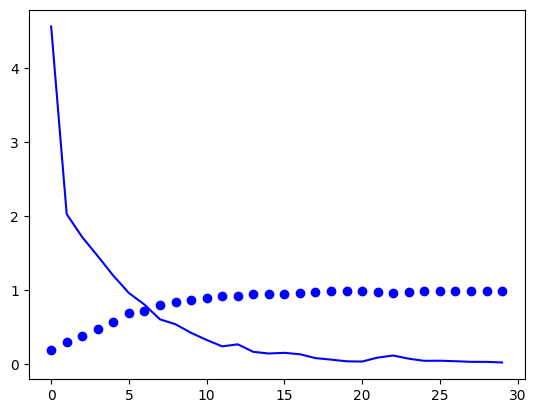

In [12]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [13]:
#Save model
model.save('/content/drive/MyDrive/Colab Notebooks/FLOWER/MODEL_FLOWER.h5')